# Minimal Waveguide Example
In this example we show how to calculate the stationary paraxial field for a slab and cylindircal waveguide using PyPropagate.

In [1]:
from pypropagate import *
%matplotlib inline

## Setting up the propagators
We begin by creating the settings for the propagator. We set a simulation box of size $1 \mu \text{m} \times 1 \mu \text{m} \times 0.5 \text{mm}$ and $1000 \cdot 1000 \cdot 1000$ voxels and set initial and boundary conditions for a monochromatic plane wave with $12 \text{keV}$ photon energy.
Note that we could also set the $x_\text{min}$, $x_\text{max}$, $N_x$, ... boundaries individually.

In [2]:
settings = presets.settings.create_paraxial_wave_equation_settings()
settings.simulation_box.set((0.25*units.um,0.25*units.um,0.25*units.mm),(1000,1000,1000))
presets.boundaries.set_plane_wave_initial_conditions(settings)
settings.wave_equation.set_energy(12*units.keV)

Our waveguide will consist of a vacuum core with a Titanium cladding. We can automatically lookup the refraction index for a compund material by providing chemical formula.

In [3]:
nVa = 1
nGe = presets.medium.create_material('Ge',settings)

For a slab waveguide we will use a one dimensional and for a circular waveguide a two dimensional propagator. Since the one dimensional propagator assumes the values for $y = 0$ are valid everywhere we can define both waveguides with one formula. As the waveguide radius we choose $24\text{nm}$.

In [4]:
s = settings.symbols
waveguide_radius = 25*units.nm
settings.wave_equation.n = pc.piecewise((nVa,pc.sqrt(s.x**2+s.y**2) <= waveguide_radius),(nGe,True))
settings.get_numeric(s.n)

piecewise(tuple(1,sqrt(x**2+y**2)<=m/4e7),tuple(1/1e16*9999935658021387-1/5e21*3560064055767287*i,True))

## Slab Waveguide
We now calculate the stationary solution for the slab waveguide using the one dimensional finite differences propagator.

In [5]:
propagator = propagators.FiniteDifferences2D(settings)

propagating:|███████████████████████| 999/999 [0.2s < 0(0)s]]


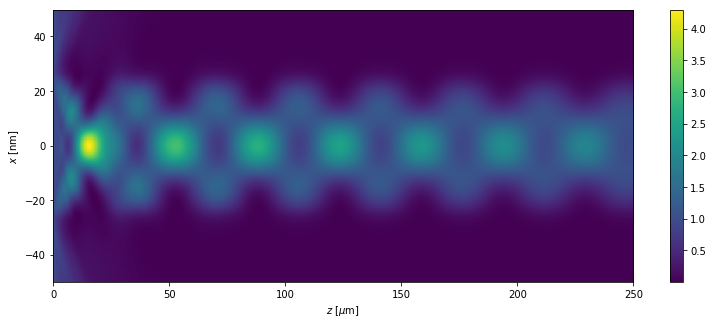

In [6]:
field = propagator.run_slice()[-2*waveguide_radius:2*waveguide_radius]
plot(field,figsize = (13,5));

## Cylindrical Waveguide
With the same settings we can calculate the solution for a cylindrical waveguide by using a cylindrically symmetrical finite differences propagator.

In [7]:
propagator = propagators.FiniteDifferencesCS(settings)

propagating:|███████████████████████| 999/999 [0.3s < 0(0)s]]


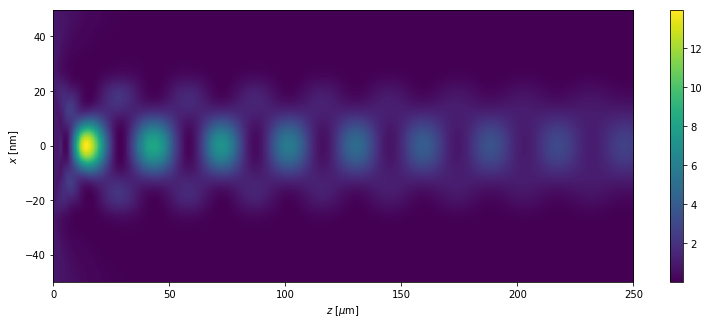

In [8]:
field = propagator.run_slice()[-2*waveguide_radius:2*waveguide_radius]
plot(field,figsize = (13,5));